# 🌸 **IRIS FLOWER CLASSIFICATION**

**Project Objective:**  
This project demonstrates the use of **machine learning algorithms** to classify iris flowers into three species:

- **Setosa**
- **Versicolor**
- **Virginica**

based on the following floral measurements:

- **Sepal Length**
- **Sepal Width**
- **Petal Length**
- **Petal Width**

**Goals of This Project:**

- Perform **data preprocessing** and **exploratory data analysis (EDA)**
- Create insightful **visualizations** to identify patterns and relationships
- Train and evaluate **classification models** using Scikit-learn

**Python Libraries Used:**

- 📊 **Pandas** and **NumPy** for data manipulation  
- 🎨 **Matplotlib** and **Seaborn** for visualization  
- 🤖 **Scikit-learn** for machine learning model building and evaluation

This project uses the well-known **Iris dataset**, which is often used as a beginner’s dataset in the field of data science due to its simplicity, clarity, and balanced classes.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report









In [90]:
# Method 1: Use raw string by adding 'r' prefix
df = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\archive.zip")

# Method 2: Use forward slashes instead of backslashes
# df = pd.read_csv("C:/Users/acer/OneDrive/Desktop/archive.zip")

# Method 3: Use double backslashes
# df = pd.read_csv("C:\\Users\\acer\\OneDrive\\Desktop\\archive.zip")

# Print all data in the dataframe
print(df)  # This will print the entire dataframe

# If the file is large, you might want to display all rows
# pd.set_option('display.max_rows', None)
# print(df)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

## 🧹 **Basic Info & Cleaning**


In [104]:
# Extract and load the data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files in the archive
    file_list = zip_ref.namelist()
    
    # Print available files to help identify the CSV/data file
    print("Files in the archive:")
    for file in file_list:
        print(f" - {file}")
    
    # Assuming there's a CSV file in the archive
    # Look for CSV files
    csv_files = [f for f in file_list if f.endswith('.csv')]
    
    if csv_files:
        # Extract the first CSV file found
        data_file = csv_files[0]
        print(f"\nLoading data from: {data_file}")
        
        # Extract and read the file
        with zip_ref.open(data_file) as file:
            df = pd.read_csv(file)
    else:
        print("No CSV files found in the archive. Please specify the correct file manually.")
        # If no CSV files, you might need to extract the archive first
        extract_dir = os.path.splitext(zip_path)[0]  # Remove .zip extension
        zip_ref.extractall(extract_dir)
        print(f"Files extracted to: {extract_dir}")

# If df was successfully loaded, continue with analysis
if 'df' in locals():
    # Check for missing values and data types
    print("\nDataFrame Information:")
    df.info()
    
    print("\nMissing Values Count:")
    print(df.isnull().sum())
    
    # Drop unnecessary columns (like Id if present)
    if 'Id' in df.columns:
        df.drop("Id", axis=1, inplace=True)
        print("\n'Id' column dropped.")
    
    # Display first few rows of the data
    print("\nFirst 5 rows of the data:")
    print(df.head())
    
    # Basic statistics
    print("\nBasic statistics:")
    print(df.describe())

Files in the archive:
 - Iris.csv

Loading data from: Iris.csv

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Missing Values Count:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

'Id' column dropped.

First 5 rows of the data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4     

Files in the archive:
 - Iris.csv

Loading data from: Iris.csv

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Missing Values Count:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

'Id' column dropped.

First 5 rows of the data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4     

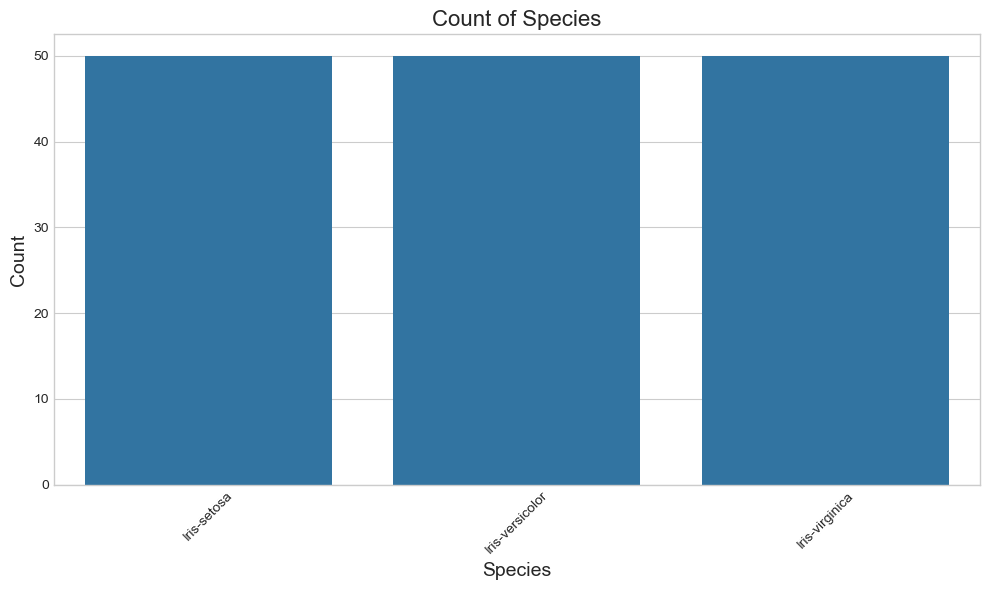


Species Count:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Figure size 1200x1000 with 0 Axes>

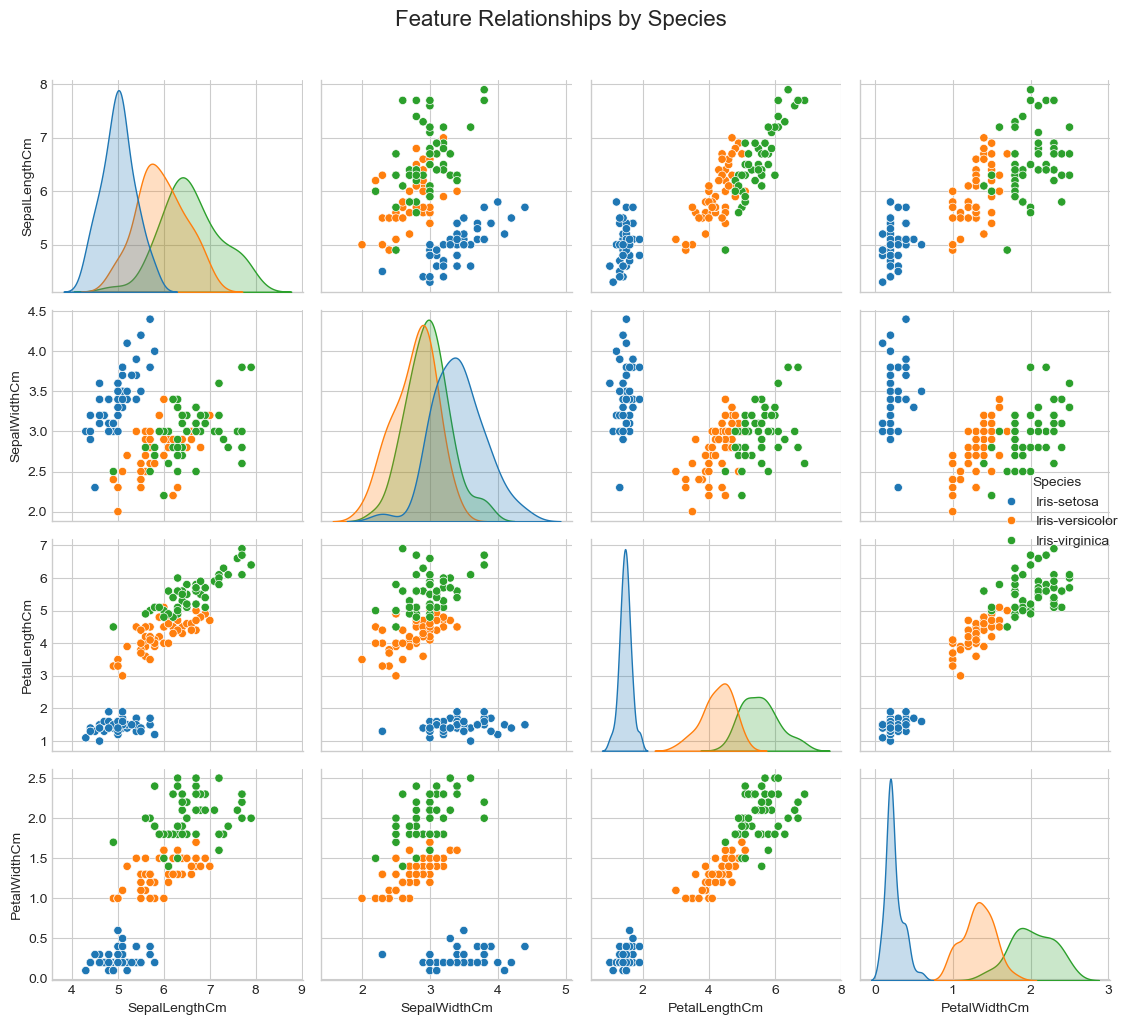

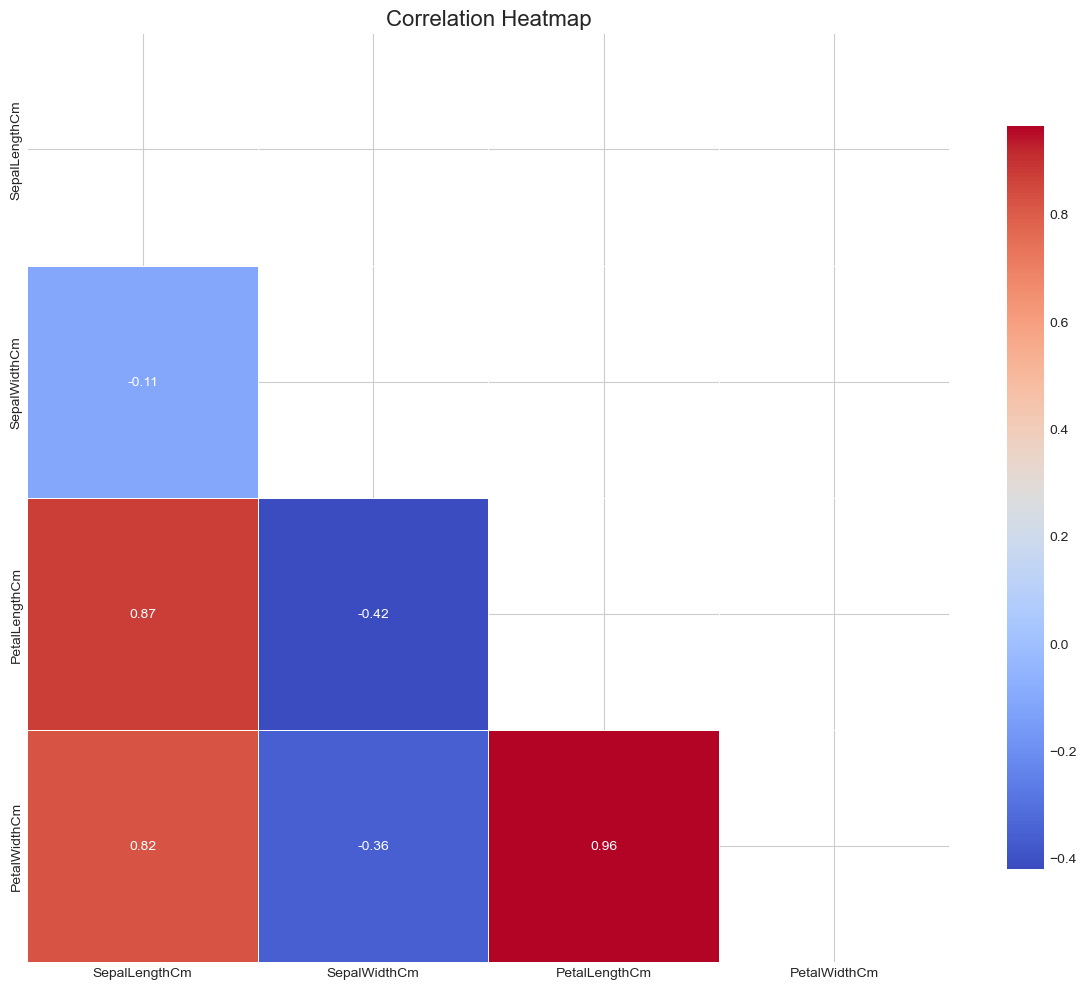


Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


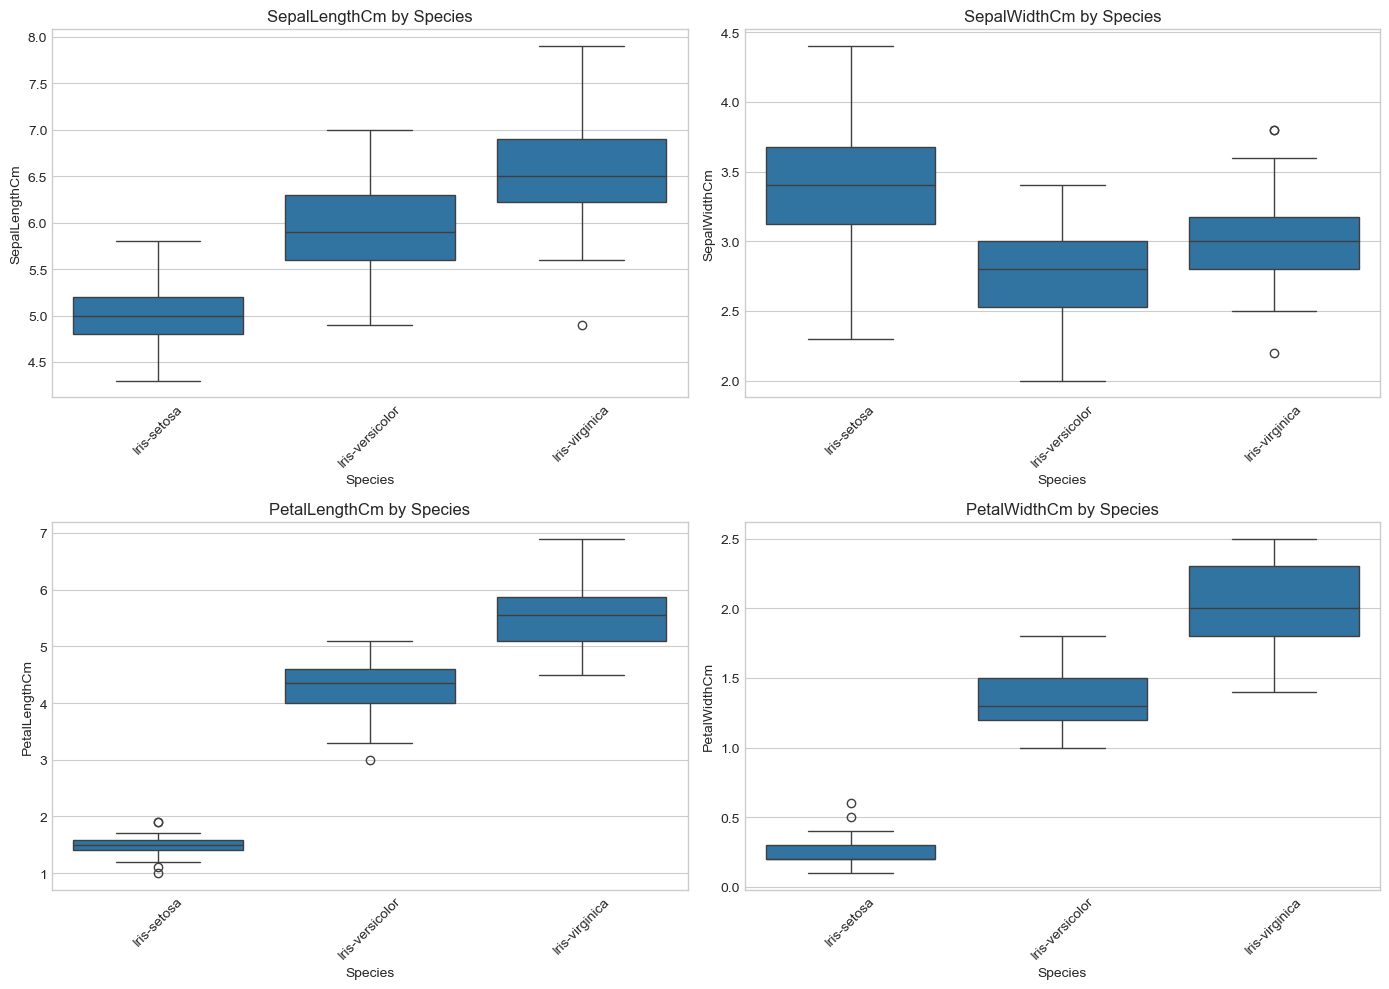

In [113]:
# Path to the ZIP file
zip_path = r"C:\Users\acer\OneDrive\Desktop\archive.zip"

# Extract and load the data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files in the archive
    file_list = zip_ref.namelist()
    
    # Print available files to help identify the CSV/data file
    print("Files in the archive:")
    for file in file_list:
        print(f" - {file}")
    
    # Assuming there's a CSV file in the archive
    # Look for CSV files
    csv_files = [f for f in file_list if f.endswith('.csv')]
    
    if csv_files:
        # Extract the first CSV file found
        data_file = csv_files[0]
        print(f"\nLoading data from: {data_file}")
        
        # Extract and read the file
        with zip_ref.open(data_file) as file:
            df = pd.read_csv(file)
    else:
        print("No CSV files found in the archive. Please specify the correct file manually.")
        # If no CSV files, you might need to extract the archive first
        extract_dir = os.path.splitext(zip_path)[0]  # Remove .zip extension
        zip_ref.extractall(extract_dir)
        print(f"Files extracted to: {extract_dir}")

# If df was successfully loaded, continue with analysis
if 'df' in locals():
    # Check for missing values and data types
    print("\nDataFrame Information:")
    df.info()
    
    print("\nMissing Values Count:")
    print(df.isnull().sum())
    
    # Drop unnecessary columns (like Id if present)
    if 'Id' in df.columns:
        df.drop("Id", axis=1, inplace=True)
        print("\n'Id' column dropped.")
    
    # Display first few rows of the data
    print("\nFirst 5 rows of the data:")
    print(df.head())
    
    # Basic statistics
    print("\nBasic statistics:")
    print(df.describe())
    
    # Set up the plotting environment
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams['figure.figsize'] = (12, 8)
    
    # 1. Species Count Visualization
    # Assuming there's a 'Species' column - adjust if it has a different name
    species_column = None
    for col in df.columns:
        if 'species' in col.lower() or 'class' in col.lower() or 'category' in col.lower() or 'type' in col.lower():
            species_column = col
            break
    
    if species_column:
        plt.figure(figsize=(10, 6))
        species_counts = df[species_column].value_counts()
        sns.barplot(x=species_counts.index, y=species_counts.values)
        plt.title(f'Count of {species_column}', fontsize=16)
        plt.xlabel(species_column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig('species_count.png')
        plt.show()
        
        print(f"\n{species_column} Count:")
        print(species_counts)
    else:
        print("\nNo species/class column found. Please specify the correct column name.")
    
    # 2. Feature Relationships - Pairplot
    # Select only numeric columns for the pairplot
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) > 1:  # Need at least 2 numeric columns for relationships
        if species_column and species_column in df.columns:
            # If we have a species column, use it for hue
            plt.figure(figsize=(12, 10))
            sns.pairplot(df, hue=species_column, vars=numeric_cols[:5], height=2.5)  # Limit to first 5 numeric features
            plt.suptitle('Feature Relationships by Species', y=1.02, fontsize=16)
            plt.tight_layout()
            plt.savefig('feature_relationships.png')
            plt.show()
        else:
            # If no species column, create pairplot without hue
            plt.figure(figsize=(12, 10))
            sns.pairplot(df, vars=numeric_cols[:5], height=2.5)  # Limit to first 5 numeric features
            plt.suptitle('Feature Relationships', y=1.02, fontsize=16)
            plt.tight_layout()
            plt.savefig('feature_relationships.png')
            plt.show()
    
    # 3. Correlation Heatmap
    if len(numeric_cols) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = df[numeric_cols].corr()
        mask = np.triu(correlation_matrix)
        sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                   mask=mask, linewidths=0.5, cbar_kws={"shrink": .8})
        plt.title('Correlation Heatmap', fontsize=16)
        plt.tight_layout()
        plt.savefig('correlation_heatmap.png')
        plt.show()
        
        print("\nCorrelation Matrix:")
        print(correlation_matrix)
    
    # 4. Box plots for numeric features by species (if species column exists)
    if species_column and len(numeric_cols) > 0:
        # Limit to first 4 numeric features for clarity
        features_to_plot = numeric_cols[:4]
        
        plt.figure(figsize=(14, 10))
        for i, feature in enumerate(features_to_plot, 1):
            plt.subplot(2, 2, i)
            sns.boxplot(x=species_column, y=feature, data=df)
            plt.title(f'{feature} by {species_column}')
            plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig('boxplots_by_species.png')
        plt.show()

In [109]:
# Encode the target column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
# Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [114]:
# 📁 Step 1: Extract the ZIP file
zip_path = r"C:\Users\acer\OneDrive\Desktop\archive.zip"
extract_to = r"C:\Users\acer\OneDrive\Desktop\iris_extracted"
os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ ZIP file extracted to:", extract_to)

# 🔍 Step 2: Find the CSV file automatically
csv_file = None
for file in os.listdir(extract_to):
    if file.endswith(".csv"):
        csv_file = os.path.join(extract_to, file)
        break

if csv_file is None:
    print("❌ No CSV file found in the extracted folder.")
else:
    print("✅ Found CSV file:", csv_file)

# 📄 Step 3: Load the data
df = pd.read_csv(csv_file)

# 🧹 Step 4: Clean and preprocess
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 5: Train the Logistic Regression model
model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

# 🎯 Step 6: Make predictions and evaluate
y_pred_lr = model_lr.predict(X_test)

print("\n📌 Logistic Regression Results")
print("🔍 Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))


✅ ZIP file extracted to: C:\Users\acer\OneDrive\Desktop\iris_extracted
✅ Found CSV file: C:\Users\acer\OneDrive\Desktop\iris_extracted\Iris.csv

📌 Logistic Regression Results
🔍 Accuracy: 100.0 %

📊 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

📄 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## ✅ Conclusion

- Logistic Regression and Decision Tree both performed very well on the Iris dataset.
- The dataset is clean and well-balanced, making it ideal for basic classification tasks.
- This project helped understand the ML pipeline: Data Cleaning → Visualization → Preprocessing → Modeling → Evaluation.
